# 1.What are the patterns/behavior of churned users? What are your suggestions to the company to reduce churned users.

##EDA

In [ ]:
#Import thu vien va dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


dataset= pd.read_excel("https://drive.google.com/uc?export=download&id=1yxgr0Qj3TiXRehYa0PED1t4zIga9gdY5")
raw_data= dataset.copy()
raw_data.head(10)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
5,50006,1,0.0,Computer,1,22.0,Debit Card,Female,3.0,5,Mobile Phone,5,Single,2,1,22.0,4.0,6.0,7.0,139.19
6,50007,1,NaN,Phone,3,11.0,Cash on Delivery,Male,2.0,3,Laptop & Accessory,2,Divorced,4,0,14.0,0.0,1.0,0.0,120.86
7,50008,1,NaN,Phone,1,6.0,CC,Male,3.0,3,Mobile,2,Divorced,3,1,16.0,2.0,2.0,0.0,122.93
8,50009,1,13.0,Phone,3,9.0,E wallet,Male,NaN,4,Mobile,3,Divorced,2,1,14.0,0.0,1.0,2.0,126.83
9,50010,1,NaN,Phone,1,31.0,Debit Card,Male,2.0,5,Mobile,3,Single,2,0,12.0,1.0,1.0,1.0,122.93


### Check info & missing value

In [ ]:
raw_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

=> Missing value: Tenure, WarehouseToHome
, HourSpendOnApp, OrderAmountHikeFromlastYear
, CouponUsed, OrderCOunt, DaySinceLast Order

=> Wrong type:PreferredLoginDevice , PreferredPaymentMode
, Gender, PreferedOrderCat ,MaritalStatus

In [ ]:
#Adjust type data
raw_data=raw_data.astype({'PreferredLoginDevice':'category', 'PreferredPaymentMode':'category', 'Gender':'category', 'PreferedOrderCat':'category', 'MaritalStatus':'category'})
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   CustomerID                   5630 non-null   int64   
 1   Churn                        5630 non-null   int64   
 2   Tenure                       5366 non-null   float64 
 3   PreferredLoginDevice         5630 non-null   category
 4   CityTier                     5630 non-null   int64   
 5   WarehouseToHome              5379 non-null   float64 
 6   PreferredPaymentMode         5630 non-null   category
 7   Gender                       5630 non-null   category
 8   HourSpendOnApp               5375 non-null   float64 
 9   NumberOfDeviceRegistered     5630 non-null   int64   
 10  PreferedOrderCat             5630 non-null   category
 11  SatisfactionScore            5630 non-null   int64   
 12  MaritalStatus                5630 non-null   category
 13  Num

In [ ]:
# Fill missing value by median in that columns
raw_data[['Tenure', 'WarehouseToHome' , 'HourSpendOnApp', 'OrderAmountHikeFromlastYear' , 'CouponUsed', 'OrderCount', 'DaySinceLastOrder']]=raw_data[['Tenure', 'WarehouseToHome' , 'HourSpendOnApp', 'OrderAmountHikeFromlastYear' , 'CouponUsed', 'OrderCount', 'DaySinceLastOrder']].fillna(
    raw_data[['Tenure', 'WarehouseToHome' , 'HourSpendOnApp', 'OrderAmountHikeFromlastYear' , 'CouponUsed', 'OrderCount', 'DaySinceLastOrder']].median()
)
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   CustomerID                   5630 non-null   int64   
 1   Churn                        5630 non-null   int64   
 2   Tenure                       5630 non-null   float64 
 3   PreferredLoginDevice         5630 non-null   category
 4   CityTier                     5630 non-null   int64   
 5   WarehouseToHome              5630 non-null   float64 
 6   PreferredPaymentMode         5630 non-null   category
 7   Gender                       5630 non-null   category
 8   HourSpendOnApp               5630 non-null   float64 
 9   NumberOfDeviceRegistered     5630 non-null   int64   
 10  PreferedOrderCat             5630 non-null   category
 11  SatisfactionScore            5630 non-null   int64   
 12  MaritalStatus                5630 non-null   category
 13  Num

In [ ]:
raw_data.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000
mean,52815.500000,0.168384,10.134103,1.654707,15.566785,2.934636,3.688988,3.066785,4.214032,0.284902,15.674600,1.716874,2.961812,4.459325,177.223030
std,1625.385339,0.374240,8.357951,0.915389,8.345961,0.705528,1.023999,1.380194,2.583586,0.451408,3.591058,1.857640,2.879248,3.570626,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,3.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,15.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


### Check duplicate

In [ ]:
raw_data.duplicated().unique()

array([False])

### Check imbalanced

In [ ]:
label_ratio= raw_data['Churn'].value_counts(normalize=True)
label_ratio

,proportion
Churn,
0,0.831616
1,0.168384


=> Still apply model and adjust if the accuracy score is too low

###Define type data

In [ ]:
raw_data.dtypes.unique()

array([dtype('int64'), dtype('float64'),
       CategoricalDtype(categories=['Computer', 'Mobile Phone', 'Phone'], ordered=False, categories_dtype=object),
       CategoricalDtype(categories=['CC', 'COD', 'Cash on Delivery', 'Credit Card', 'Debit Card',
                         'E wallet', 'UPI'],
       , ordered=False, categories_dtype=object)                                                 ,
       CategoricalDtype(categories=['Female', 'Male'], ordered=False, categories_dtype=object),
       CategoricalDtype(categories=['Fashion', 'Grocery', 'Laptop & Accessory', 'Mobile',
                         'Mobile Phone', 'Others'],
       , ordered=False, categories_dtype=object)                                         ,
       CategoricalDtype(categories=['Divorced', 'Married', 'Single'], ordered=False, categories_dtype=object)],
      dtype=object)

In [ ]:
num_cols= raw_data.select_dtypes(exclude=['category'])
cat_cols= raw_data.select_dtypes(include=['category'])

In [ ]:
num_cols.nunique()

,0
CustomerID,5630
Churn,2
Tenure,36
CityTier,3
WarehouseToHome,34
HourSpendOnApp,6
NumberOfDeviceRegistered,6
SatisfactionScore,5
NumberOfAddress,15
Complain,2


AS the result, Churn & CityTier & HourSpendOnApp & NumberOfDeviceRegistered  &  SatisfactionScore & Complain  have categorical meaning (less than 10 unique values

In [ ]:
raw_data=raw_data.astype({'CityTier':'category', 'HourSpendOnApp':'category', 'NumberOfDeviceRegistered':'category', 'SatisfactionScore':'category', 'Complain':'category'})
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   CustomerID                   5630 non-null   int64   
 1   Churn                        5630 non-null   int64   
 2   Tenure                       5630 non-null   float64 
 3   PreferredLoginDevice         5630 non-null   category
 4   CityTier                     5630 non-null   category
 5   WarehouseToHome              5630 non-null   float64 
 6   PreferredPaymentMode         5630 non-null   category
 7   Gender                       5630 non-null   category
 8   HourSpendOnApp               5630 non-null   category
 9   NumberOfDeviceRegistered     5630 non-null   category
 10  PreferedOrderCat             5630 non-null   category
 11  SatisfactionScore            5630 non-null   category
 12  MaritalStatus                5630 non-null   category
 13  Num

### Feature transforming => apply RandomForest model to identify the features

In [ ]:
#only Drop columns: CustomerId because it's just a primary key to identify
data_transform= raw_data.copy().drop('CustomerID', axis=1)
data_transform.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,1,9.0,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,1,9.0,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,1,0.0,Phone,1,12.0,CC,Male,3.0,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [ ]:

cate_columns= data_transform.select_dtypes(include=['category']).columns.tolist()

encode_df= pd.get_dummies(data_transform,columns=cate_columns, drop_first=True, dtype='int')
encode_df.shape
encode_df.head()



,Churn,Tenure,WarehouseToHome,NumberOfAddress,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,PreferredLoginDevice_Mobile Phone,...,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,SatisfactionScore_2,SatisfactionScore_3,SatisfactionScore_4,SatisfactionScore_5,MaritalStatus_Married,MaritalStatus_Single,Complain_1
0,1,4.0,6.0,9,11.0,1.0,1.0,5.0,159.93,1,...,0,0,0,1,0,0,0,0,1,1
1,1,9.0,8.0,7,15.0,0.0,1.0,0.0,120.90,0,...,1,0,0,0,1,0,0,0,1,1
2,1,9.0,30.0,6,14.0,0.0,1.0,3.0,120.28,0,...,1,0,0,0,1,0,0,0,1,1
3,1,0.0,15.0,8,23.0,0.0,1.0,3.0,134.07,0,...,0,0,0,0,0,0,1,0,1,0
4,1,0.0,12.0,3,11.0,1.0,1.0,3.0,129.60,0,...,1,0,0,0,0,0,1,0,1,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

#Scaler features:
scaler=MinMaxScaler()
model=scaler.fit(encode_df)
scaled_data=model.transform(encode_df)

scaled_df=pd.DataFrame(encode_df, columns=encode_df.columns.tolist())
scaled_df.head()


,Churn,Tenure,WarehouseToHome,NumberOfAddress,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,PreferredLoginDevice_Mobile Phone,...,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,SatisfactionScore_2,SatisfactionScore_3,SatisfactionScore_4,SatisfactionScore_5,MaritalStatus_Married,MaritalStatus_Single,Complain_1
0,1,4.0,6.0,9,11.0,1.0,1.0,5.0,159.93,1,...,0,0,0,1,0,0,0,0,1,1
1,1,9.0,8.0,7,15.0,0.0,1.0,0.0,120.90,0,...,1,0,0,0,1,0,0,0,1,1
2,1,9.0,30.0,6,14.0,0.0,1.0,3.0,120.28,0,...,1,0,0,0,1,0,0,0,1,1
3,1,0.0,15.0,8,23.0,0.0,1.0,3.0,134.07,0,...,0,0,0,0,0,0,1,0,1,0
4,1,0.0,12.0,3,11.0,1.0,1.0,3.0,129.60,0,...,1,0,0,0,0,0,1,0,1,0


### Apply RandomForest to identify related features

#### Model training & Evaluation

In [ ]:
from sklearn.model_selection import train_test_split

X= scaled_df.drop('Churn', axis=1)
y= scaled_df['Churn']

#Split the dataset
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.33, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
#Training model
model= RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

In [ ]:
#Evalue the model
accuracy_before= model.score(X_test, y_test)
print(f'Accuracy before feature selection: {accuracy_before:.2f}')



Accuracy before feature selection: 0.95


In [ ]:
#Extract feature importances
importances= model.feature_importances_
feature_names= X.columns.tolist()
feature_importances= pd.DataFrame({'Feature': feature_names, 'Importance': importances})

#Ranking features by importance
feature_importances= feature_importances.sort_values(by='Importance', ascending=False)
feature_importances

,Feature,Importance
0,Tenure,0.199971
7,CashbackAmount,0.097851
1,WarehouseToHome,0.071599
6,DaySinceLastOrder,0.063652
40,Complain_1,0.062919
3,OrderAmountHikeFromlastYear,0.058506
2,NumberOfAddress,0.057243
5,OrderCount,0.032387
4,CouponUsed,0.028574
39,MaritalStatus_Single,0.024806


In [ ]:
# Select  importance features > 0.01
top_features= feature_importances[feature_importances['Importance'] > 0.01]['Feature'].values

X_train_selected= X_train[top_features]
X_test_selected= X_test[top_features]


In [ ]:
#Train the RandomForest model with the selected features
model_selected= RandomForestClassifier(n_estimators=100, random_state=42)
model_selected.fit(X_train_selected, y_train)

#Evaluate the model with the selected features
accuracy_after= model_selected.score(X_test_selected, y_test)
print(f'Accuracy after feature selection: {accuracy_after:.2f}')

Accuracy after feature selection: 0.95


In [ ]:
selected_scaled_df=scaled_df[top_features.tolist()+['Churn']]
selected_scaled_df.head()

,Tenure,CashbackAmount,WarehouseToHome,DaySinceLastOrder,Complain_1,OrderAmountHikeFromlastYear,NumberOfAddress,OrderCount,CouponUsed,MaritalStatus_Single,...,SatisfactionScore_4,MaritalStatus_Married,PreferredPaymentMode_Debit Card,NumberOfDeviceRegistered_4,PreferredPaymentMode_E wallet,PreferredPaymentMode_Credit Card,HourSpendOnApp_3.0,PreferredLoginDevice_Phone,NumberOfDeviceRegistered_5,Churn
0,4.0,159.93,6.0,5.0,1,11.0,9,1.0,1.0,1,...,0,0,1,0,0,0,1,0,0,1
1,9.0,120.90,8.0,0.0,1,15.0,7,1.0,0.0,1,...,0,0,0,1,0,0,1,1,0,1
2,9.0,120.28,30.0,3.0,1,14.0,6,1.0,0.0,1,...,0,0,1,1,0,0,0,1,0,1
3,0.0,134.07,15.0,3.0,0,23.0,8,1.0,0.0,1,...,0,0,1,1,0,0,0,1,0,1
4,0.0,129.60,12.0,3.0,0,11.0,3,1.0,1.0,1,...,0,0,0,0,0,0,1,1,0,1


In [ ]:
top_features

array(['Tenure', 'CashbackAmount', 'WarehouseToHome', 'DaySinceLastOrder',
       'Complain_1', 'OrderAmountHikeFromlastYear', 'NumberOfAddress',
       'OrderCount', 'CouponUsed', 'MaritalStatus_Single', 'CityTier_3',
       'Gender_Male', 'SatisfactionScore_5', 'SatisfactionScore_3',
       'PreferredLoginDevice_Mobile Phone',
       'PreferedOrderCat_Laptop & Accessory',
       'PreferedOrderCat_Mobile Phone', 'SatisfactionScore_4',
       'MaritalStatus_Married', 'PreferredPaymentMode_Debit Card',
       'NumberOfDeviceRegistered_4', 'PreferredPaymentMode_E wallet',
       'PreferredPaymentMode_Credit Card', 'HourSpendOnApp_3.0',
       'PreferredLoginDevice_Phone', 'NumberOfDeviceRegistered_5'],
      dtype=object)

=>features to train the supervised learning model
Specifically, category: 'Complain', 'Gender', 'SatisfactionScore', 'MaritalStatus', 'CityTier', 'PreferedLoginDevice', 'PreferredPaymentMode','NumberOfDeviceRegistered', 'HourSpendOnApp'

numerical: 'Tenure', 'CashbackAmount', 'WarehouseToHome', 'DaySinceLastOrder', 'OrderAmountHikeFromlastYear', 'NumberOfAddress','OrderCount','CouponUsed',

## Check Customer Behaviour

###Check numerical features

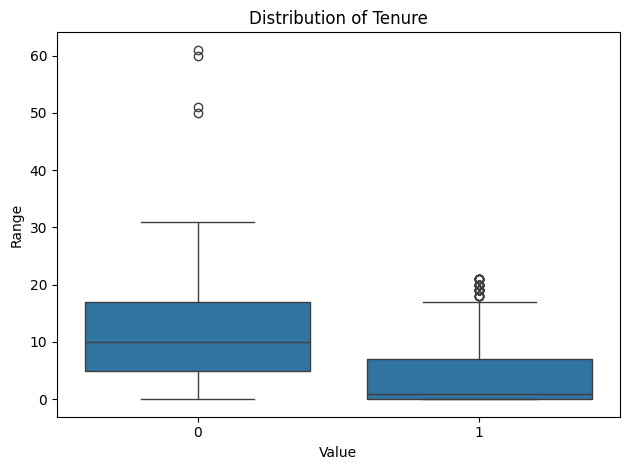

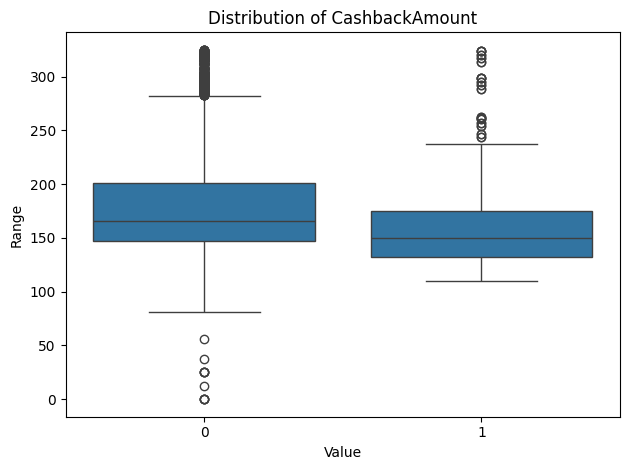

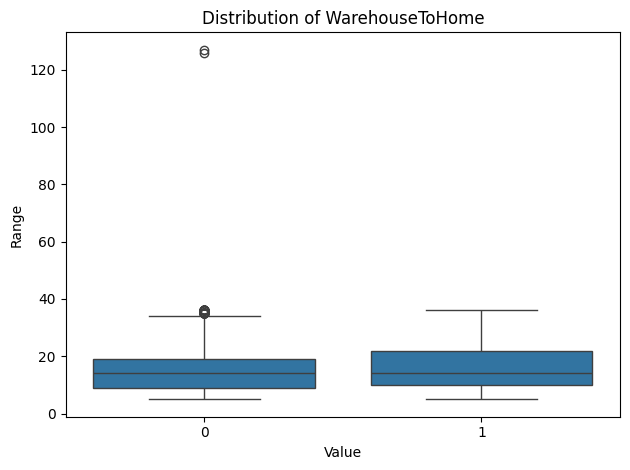

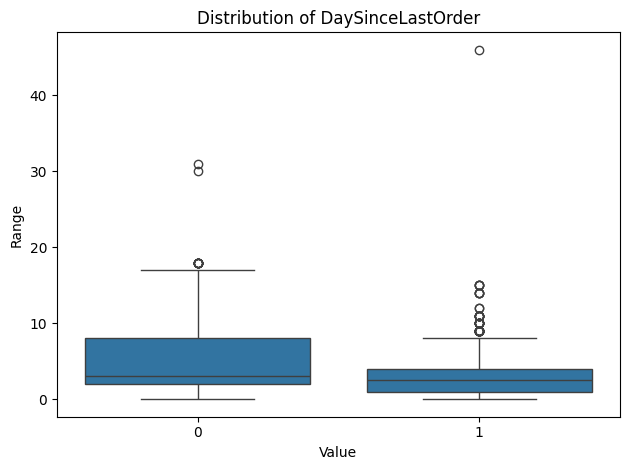

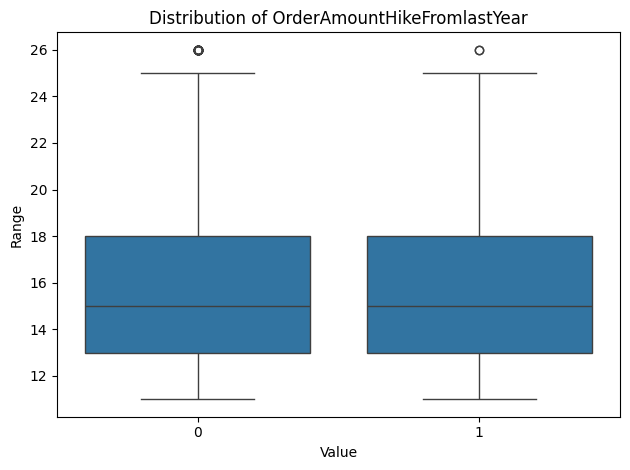

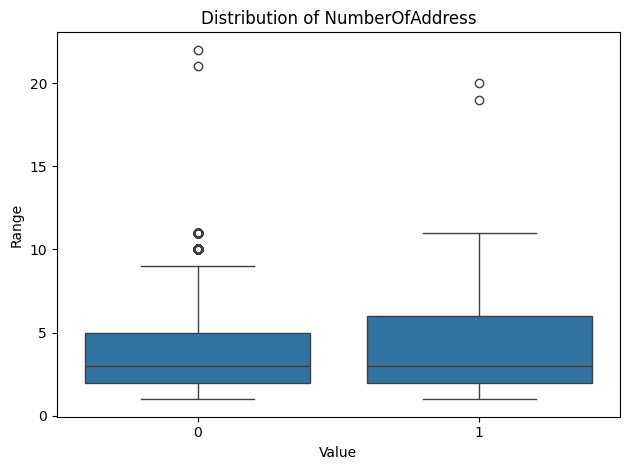

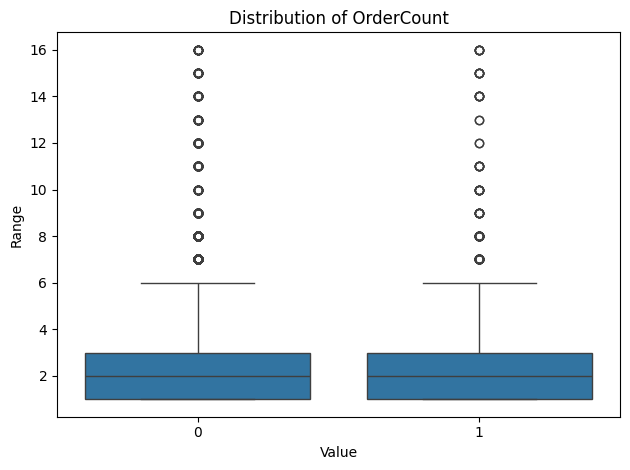

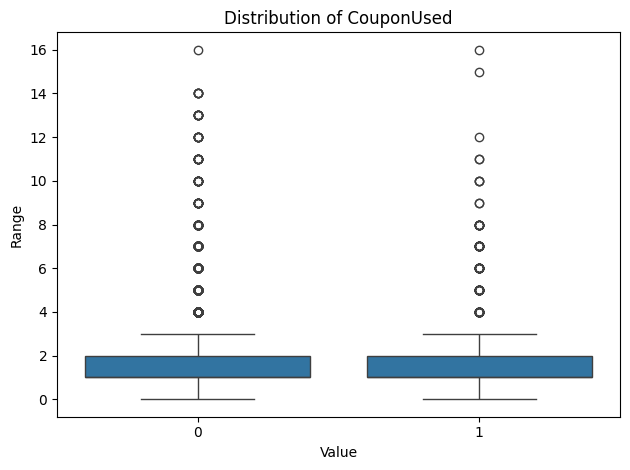

In [ ]:
numerical_cols= [ 'Tenure', 'CashbackAmount', 'WarehouseToHome', 'DaySinceLastOrder', 'OrderAmountHikeFromlastYear', 'NumberOfAddress','OrderCount','CouponUsed']

for col in numerical_cols:
    sns.boxplot(data=raw_data, x='Churn',y=col)
    plt.title(f'Distribution of {col}')
    plt.xlabel('Value')
    plt.ylabel('Range')
    plt.tight_layout()
    plt.show()

### Check categorical features

In [ ]:
def percent_barplot (df, column, target, count):

    # This function to create the table calculate the percentage of churn number group by category values

    # Create  dataframes churn and non-churn
    churned = df[df[target]==1].groupby(column)[[count]].count().reset_index().sort_values(ascending=False, by = count)
    not_churned = df[df[target]==0].groupby(column)[[count]].count().reset_index().sort_values(ascending=False, by = count)

    #Merge 2 dataframe into one:
    cate_df = churned.merge(not_churned, on = column , how = 'outer')
    cate_df = cate_df.fillna(0)
    cate_df.rename(columns = {count+'_x':'churned',count+'_y':'not_churned'}, inplace = True)

    #Caculate the percentage:
    cate_df['%'] = cate_df['churned']/(cate_df['churned']+cate_df['not_churned'])

    return cate_df

In [ ]:
categorical_cols=['Complain', 'Gender', 'SatisfactionScore', 'MaritalStatus', 'CityTier', 'PreferedLoginDevice', 'PreferredPaymentMode','NumberOfDeviceRegistered', 'HourSpendOnApp']


####Barplot categorical

<ipython-input-24-6004bd9355e8>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churned = df[df[target]==1].groupby(column)[[count]].count().reset_index().sort_values(ascending=False, by = count)
<ipython-input-24-6004bd9355e8>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  not_churned = df[df[target]==0].groupby(column)[[count]].count().reset_index().sort_values(ascending=False, by = count)


<Axes: xlabel='Complain', ylabel='%'>

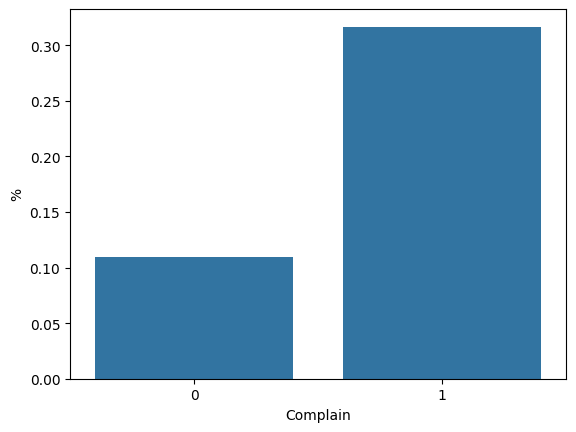

In [ ]:
barplot_df= percent_barplot(raw_data,'Complain','Churn', 'CustomerID')
sns.barplot(data=barplot_df, x='Complain', y='%')


### Patterns/Behavior of Churned Users:

1. **Tenure**: Most churned customers have a tenure of 0-5.
2. **Cashback Amount**: Most churned customers receive a cashback amount ranging from $130 to $150.
3. **Warehouse to Home Distance**: Churned customers typically live at least 10 units away from the warehouse.
4. **Order Amount Hike From Last Year**: Their order amount increased by 13-18% compared to the previous year.
5. **Number of Addresses**: They usually have 2 to 6 addresses.
6. **Complaints**: Most churned customers have 1 complaint.
7. **Marital Status**: They can be either single or married.
8. **City Tier**: They reside in City Tier 3.
9. **Gender**: Most churned customers are male.
10. **Preferred Login Device**: They use mobile phones.
11. **Preferred Order Category**: They prefer purchasing laptops and accessories, as well as mobile phones.

### Suggestions to Reduce Churn:

1. **Personalized Engagement and Retention Campaigns**:
   - **For Tenure 0-5**: Introduce onboarding programs and loyalty incentives for new customers to enhance their early experience.
   - **Cashback Optimization**: Increase or optimize cashback offers for customers within the $130-$150 range to make them feel more valued.

2. **Improve Delivery Efficiency**:
   - **Warehouse Distance**: Enhance logistics to reduce delivery times for customers far from the warehouse. Consider establishing additional warehouses closer to these customers.
  
3. **Monitor and Manage Order Increases**:
   - **Order Amount Hike**: Keep an eye on the purchasing behavior of customers whose order amount increases significantly. Provide personalized offers or discounts to sustain their engagement.

4. **Address Verification and Customer Stability**:
   - **Number of Addresses**: Verify and validate customer addresses to ensure stability and reduce issues related to multiple addresses.

5. **Customer Service Enhancement**:
   - **Complaints**: Focus on quickly resolving complaints and improving customer service to prevent dissatisfaction. Implement proactive communication to address potential issues before they result in churn.

6. **Targeted Marketing and Offers**:
   - **City Tier 3**: Tailor marketing strategies to address the specific needs and preferences of customers in City Tier 3. Offer region-specific promotions and deals.
   - **Preferred Order Categories**: Provide exclusive deals and promotions for laptops, accessories, and mobile phones to attract and retain these customers.

7. **Gender-Specific Campaigns**:
   - **Male Customers**: Develop targeted campaigns that cater to the interests and preferences of male customers, as they represent a significant portion of the churned customer base.

8. **Mobile Optimization**:
   - **Mobile Phone Users**: Ensure that the mobile app and mobile website are user-friendly, efficient, and engaging, as many churned customers use mobile devices for login.

9. **Marital Status Considerations**:
   - **Single and Married**: Design engagement strategies that cater to both single and married customers, acknowledging their different lifestyles and needs.

By focusing on these targeted strategies, the company can address the specific behaviors and preferences of churned customers, ultimately reducing churn rates and improving customer retention.

#2. Build the Machine Learning model for predicting churned users. (fine tuning)


## Check accuracy the Random Forest model

In [ ]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
selected_scaled_df.head()

,Tenure,CashbackAmount,WarehouseToHome,DaySinceLastOrder,Complain_1,OrderAmountHikeFromlastYear,NumberOfAddress,OrderCount,CouponUsed,MaritalStatus_Single,...,SatisfactionScore_4,MaritalStatus_Married,PreferredPaymentMode_Debit Card,NumberOfDeviceRegistered_4,PreferredPaymentMode_E wallet,PreferredPaymentMode_Credit Card,HourSpendOnApp_3.0,PreferredLoginDevice_Phone,NumberOfDeviceRegistered_5,Churn
0,4.0,159.93,6.0,5.0,1,11.0,9,1.0,1.0,1,...,0,0,1,0,0,0,1,0,0,1
1,9.0,120.90,8.0,0.0,1,15.0,7,1.0,0.0,1,...,0,0,0,1,0,0,1,1,0,1
2,9.0,120.28,30.0,3.0,1,14.0,6,1.0,0.0,1,...,0,0,1,1,0,0,0,1,0,1
3,0.0,134.07,15.0,3.0,0,23.0,8,1.0,0.0,1,...,0,0,1,1,0,0,0,1,0,1
4,0.0,129.60,12.0,3.0,0,11.0,3,1.0,1.0,1,...,0,0,0,0,0,0,1,1,0,1


In [ ]:
#Split data
X= selected_scaled_df.drop('Churn', axis=1)
y= selected_scaled_df['Churn']

#Split the dataset
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
#Evaluate the model with the selected features
y_pred= model_selected.predict(X_test)
print(classification_report(y_pred, y_test))


              precision    recall  f1-score   support

           0       0.99      0.96      0.97      1605
           1       0.78      0.94      0.85       253

    accuracy                           0.95      1858
   macro avg       0.88      0.95      0.91      1858
weighted avg       0.96      0.95      0.96      1858



=> I choose the RandomForest and Imporve the accuracy

## Fine tuning

In [ ]:
param_grid = {
    'n_estimators': [75, 100, 125,150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9, None],
    'max_leaf_nodes': [3, 6, 9, None],
}

In [ ]:
grid_search = GridSearchCV(RandomForestClassifier(),
                           param_grid=param_grid)
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)

KeyboardInterrupt: 

In [ ]:
model_grid = RandomForestClassifier( max_features=None
                                      , n_estimators=75)
model_grid.fit(X_train, y_train)
y_pred_grid = model_grid.predict(X_test)
print(classification_report(y_pred_grid, y_test))

=> Final model RandomForestClassifier(max_features=None, n_estimators=75)



In [ ]:
final_production_model= model_grid

# 3. Based on the behaviors of churned users, the company would like to offer some special promotions for them.
Please segment these churned users into groups. What are the differences between groups?


In [ ]:
#Select data only churned user
raw_data_churn= raw_data[raw_data['Churn']==1]
raw_data_churn.head()

scaled_df_churn= scaled_df[scaled_df['Churn']==1].drop('Churn', axis=1)
scaled_df_churn.head()

,Tenure,WarehouseToHome,NumberOfAddress,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,PreferredLoginDevice_Mobile Phone,PreferredLoginDevice_Phone,...,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,SatisfactionScore_2,SatisfactionScore_3,SatisfactionScore_4,SatisfactionScore_5,MaritalStatus_Married,MaritalStatus_Single,Complain_1
0,4.0,6.0,9,11.0,1.0,1.0,5.0,159.93,1,0,...,0,0,0,1,0,0,0,0,1,1
1,9.0,8.0,7,15.0,0.0,1.0,0.0,120.90,0,1,...,1,0,0,0,1,0,0,0,1,1
2,9.0,30.0,6,14.0,0.0,1.0,3.0,120.28,0,1,...,1,0,0,0,1,0,0,0,1,1
3,0.0,15.0,8,23.0,0.0,1.0,3.0,134.07,0,1,...,0,0,0,0,0,0,1,0,1,0
4,0.0,12.0,3,11.0,1.0,1.0,3.0,129.60,0,1,...,1,0,0,0,0,0,1,0,1,0


## Dimension Reduction

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=10)
pca.fit(scaled_df_churn)
PCA_df=pd.DataFrame(pca.transform(scaled_df_churn), columns=['PC1', 'PC2', 'PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'])
PCA_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-0.525197,-11.327242,-0.356773,-3.582756,-1.009663,4.173322,2.540810,0.168813,-0.422103,1.287840
1,-39.498070,-8.785300,6.266587,0.077199,-2.641120,1.691016,-0.096287,-0.663277,-0.128423,0.008595
2,-39.628481,12.991801,8.002824,-2.710060,-0.091222,2.218328,1.686543,-0.386139,-0.317852,0.410884
3,-26.507268,-0.742762,-2.745941,7.411889,-0.951904,3.793287,1.483851,-0.766168,-0.143182,0.895978
4,-31.021646,-4.408102,-3.021465,-4.564334,0.152440,-0.655746,1.077782,0.319732,0.463854,0.402520


In [ ]:
pca.explained_variance_ratio_

array([9.13383134e-01, 4.24301336e-02, 1.70664723e-02, 8.59053969e-03,
       7.75765436e-03, 4.22753509e-03, 2.87595954e-03, 8.25507580e-04,
       2.82213226e-04, 2.73038434e-04])

## Apply K-Mean model

### Choose K

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

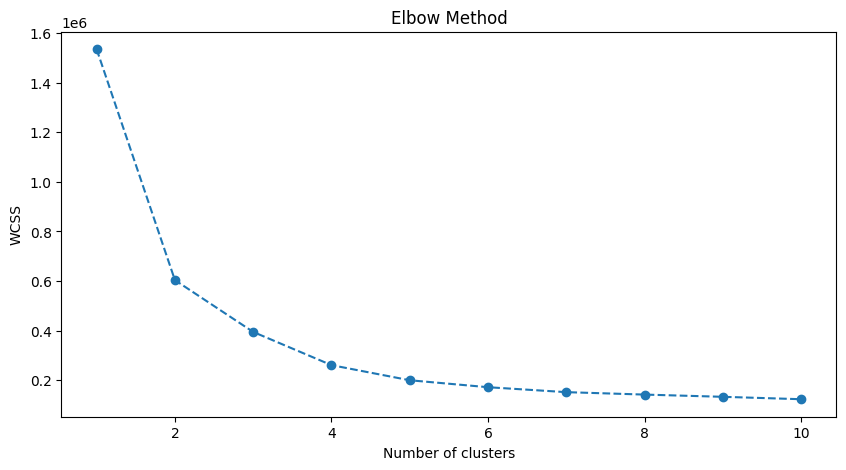

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap

ss = []
max_clusters = 10
for i in range(1, max_clusters+1):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(PCA_df)
    # Inertia method returns WCSS for that model
    ss.append(kmeans.inertia_)

# Plot the Elbow method
plt.figure(figsize=(10,5))
plt.plot(range(1, max_clusters+1), ss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

=> Choose k=4

### Apply KMeans model

In [ ]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
predicted_labels = kmeans.fit_predict(PCA_df)

PCA_df['clusters']=predicted_labels
PCA_df.head()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,clusters
0,-0.525197,-11.327242,-0.356773,-3.582756,-1.009663,4.173322,2.540810,0.168813,-0.422103,1.287840,2
1,-39.498070,-8.785300,6.266587,0.077199,-2.641120,1.691016,-0.096287,-0.663277,-0.128423,0.008595,0
2,-39.628481,12.991801,8.002824,-2.710060,-0.091222,2.218328,1.686543,-0.386139,-0.317852,0.410884,0
3,-26.507268,-0.742762,-2.745941,7.411889,-0.951904,3.793287,1.483851,-0.766168,-0.143182,0.895978,0
4,-31.021646,-4.408102,-3.021465,-4.564334,0.152440,-0.655746,1.077782,0.319732,0.463854,0.402520,0


In [ ]:
raw_data_churn['clusters']=predicted_labels
raw_data_churn.head()

<ipython-input-116-06424d698e3d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data_churn['clusters']=predicted_labels


,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,...,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,clusters
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,...,2,Single,9,1,11.0,1.0,1.0,5.0,159.93,2
1,50002,1,9.0,Phone,1,8.0,UPI,Male,3.0,4,...,3,Single,7,1,15.0,0.0,1.0,0.0,120.90,0
2,50003,1,9.0,Phone,1,30.0,Debit Card,Male,2.0,4,...,3,Single,6,1,14.0,0.0,1.0,3.0,120.28,0
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,...,5,Single,8,0,23.0,0.0,1.0,3.0,134.07,0
4,50005,1,0.0,Phone,1,12.0,CC,Male,3.0,3,...,5,Single,3,0,11.0,1.0,1.0,3.0,129.60,0


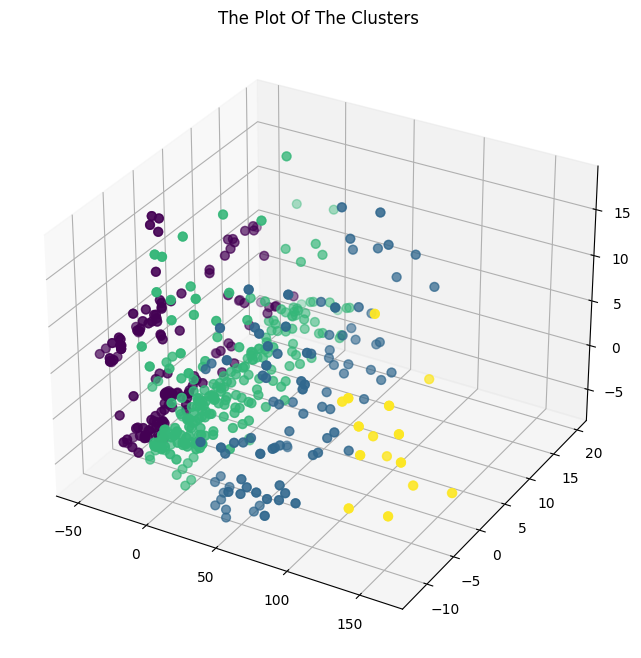

In [ ]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(PCA_df['PC1'], PCA_df['PC2'], PCA_df['PC3'], s=40, c=PCA_df["clusters"], marker='o')
ax.set_title("The Plot Of The Clusters")
plt.show()

### Evaluating the model

#### Silhouette Score

In [ ]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(PCA_df, predicted_labels)
print(sil_score)

0.414107928718356


####Distribution of the clusters

<ipython-input-119-9491b0eaf044>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.countplot(x=raw_data_churn["clusters"], palette= pal)


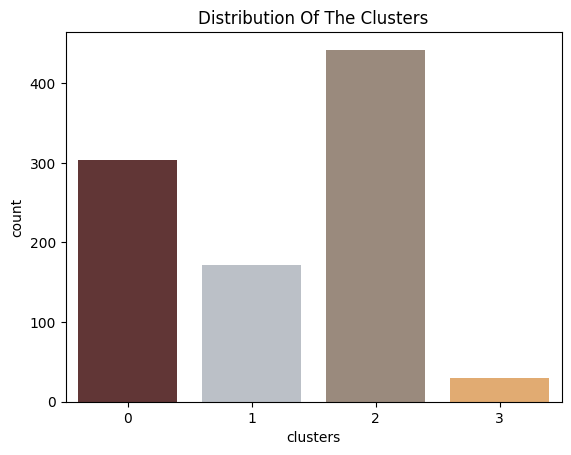

In [ ]:
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=raw_data_churn["clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

<Axes: >

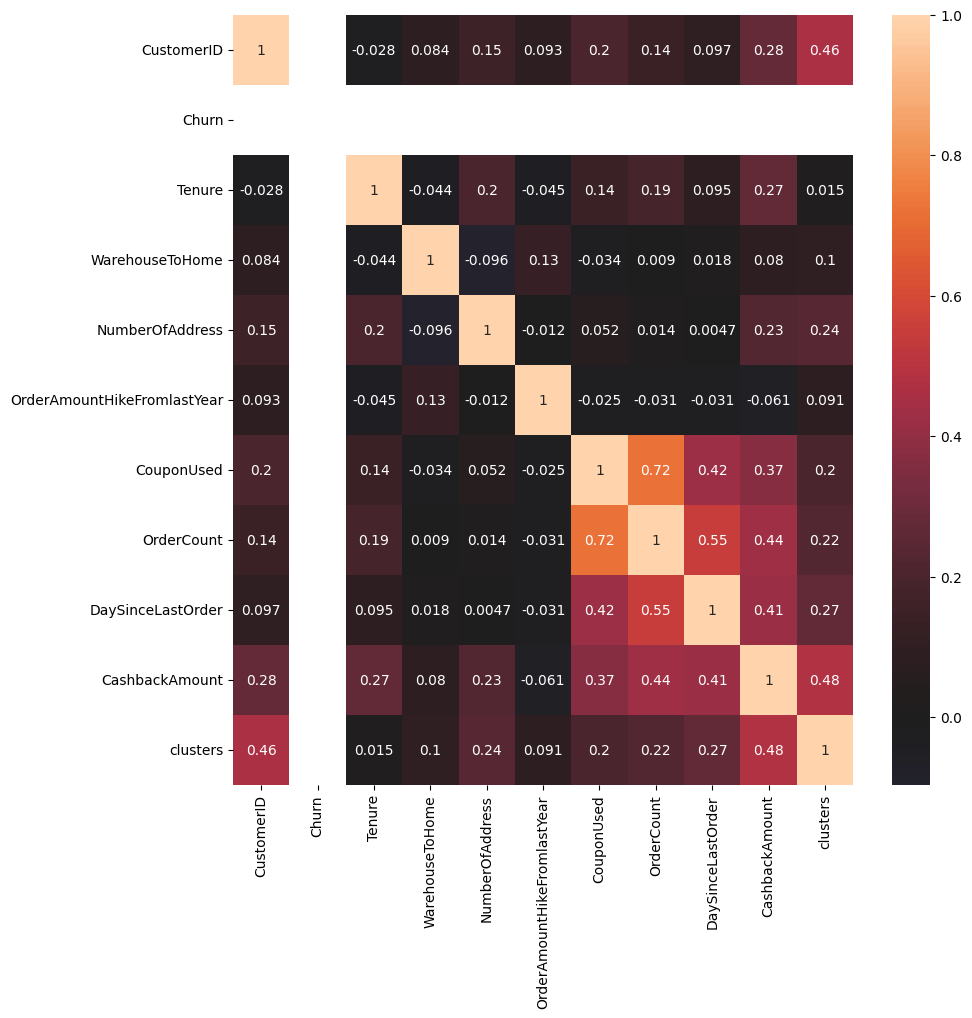

In [ ]:
#correlation matrix
corrmat= raw_data_churn.select_dtypes(exclude=['category']).corr()
plt.figure(figsize=(10,10))
sns.heatmap(corrmat,annot=True, center=0)

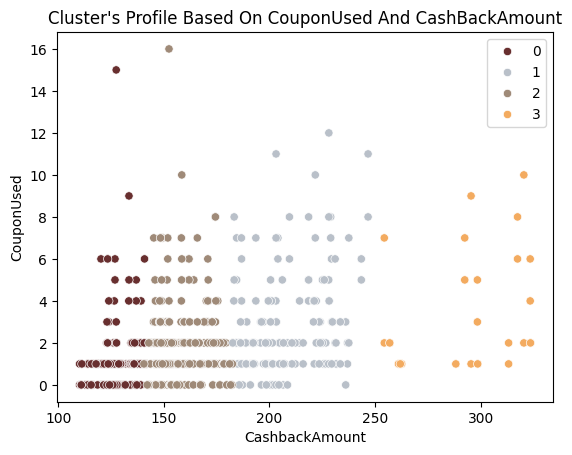

In [ ]:
pl = sns.scatterplot(data = raw_data_churn,x=raw_data_churn["CashbackAmount"], y=raw_data_churn["CouponUsed"],hue=raw_data_churn["clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On CouponUsed And CashBackAmount")
plt.legend()
plt.show()

Group 0: The customer sometimes use coupons and the cashback from 125 to 150

Group 1: The customer sometimes use coupons and the cashback from 175 to 250

Group 2: The customer sometimes use coupons and the cashback from 150 to 175

Group 3: The customer usually use coupons and the cashback is higher than the other at least 250

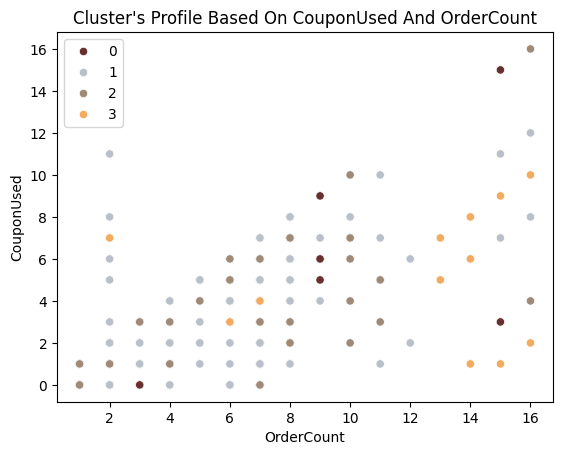

In [ ]:
pl = sns.scatterplot(data = raw_data_churn,x=raw_data_churn["OrderCount"], y=raw_data_churn["CouponUsed"],hue=raw_data_churn["clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On CouponUsed And OrderCount")
plt.legend()
plt.show()

Group 0: sometimes use coupon

Group 1: usually use coupon

Group 2: always use coupon

Group 3: often use coupon

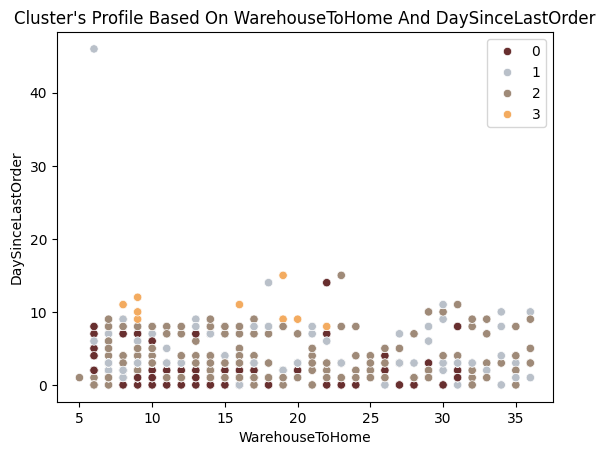

In [ ]:
pl = sns.scatterplot(data = raw_data_churn,x=raw_data_churn["WarehouseToHome"], y=raw_data_churn["DaySinceLastOrder"],hue=raw_data_churn["clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On WarehouseToHome And DaySinceLastOrder")
plt.legend()
plt.show()

Group 0: near distance from warehouse and time of recent purchase

Group 1: near distance from warehouse and time ofrecent purchase

Group 2: far distance from warehouse and time of most recent purchase

Group 3: near distance from warehouse and non-usually purchase

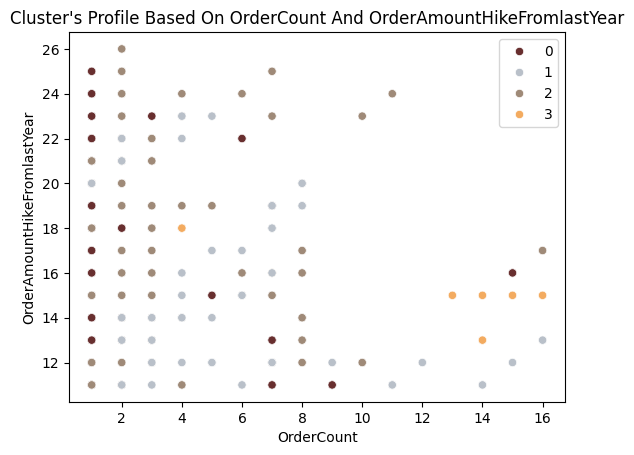

In [ ]:
pl = sns.scatterplot(data = raw_data_churn,x=raw_data_churn["OrderCount"], y=raw_data_churn["OrderAmountHikeFromlastYear"],hue=raw_data_churn["clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On OrderCount And OrderAmountHikeFromlastYear")
plt.legend()
plt.show()

Group 0: frequency is low, but the % increse is high

Group 1:frequency is medium, the % increase is high

Group 2: frequency is low, but the % increase is high

Group 3: frequency is highest, but the increase is lowest

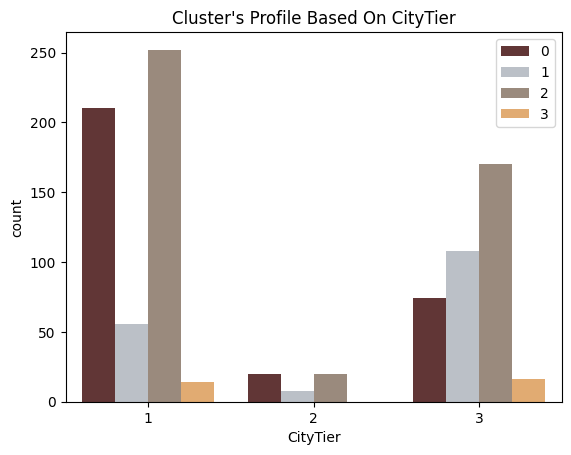

In [ ]:
pl = sns.countplot(data = raw_data_churn,x=raw_data_churn["CityTier"],hue=raw_data_churn["clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On CityTier")
plt.legend()
plt.show()

Group 0: most live in CityTier 1

Group 1: live in both 3 CityTier

Group 2:

Group 3: most live in CityTier 1 and 3

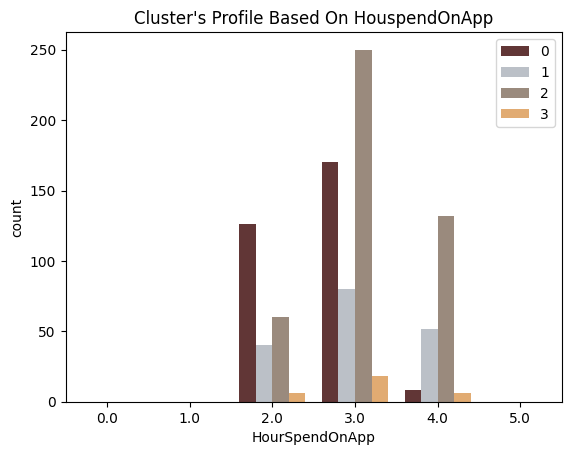

In [ ]:
pl = sns.countplot(data = raw_data_churn,x=raw_data_churn["HourSpendOnApp"],hue=raw_data_churn["clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On HouspendOnApp")
plt.legend()
plt.show()

Group 0: Hour Spend is lower 3

Group 1: Average Spend hour is 3

Group 2: most Spend hour is 3

Group 3: The spend hour is lowest

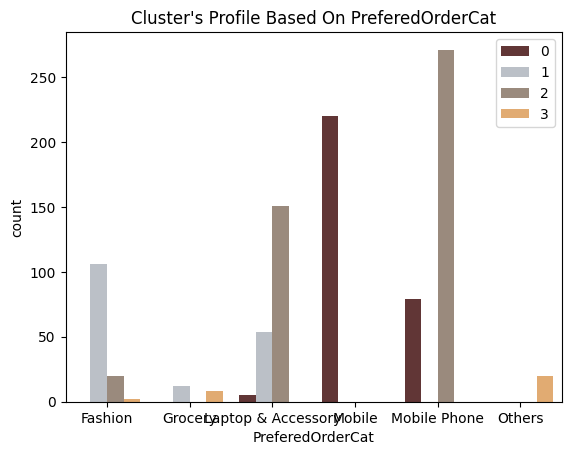

In [ ]:
pl = sns.countplot(data = raw_data_churn,x=raw_data_churn["PreferedOrderCat"],hue=raw_data_churn["clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On PreferedOrderCat")
plt.legend()
plt.show()

Group 0: Spend most for Mobile

Group 1: just spend for Fashion and Laptop & Accessory

Group 2: just spend for Mobile phone and Laptop & Accessory

Group 3:

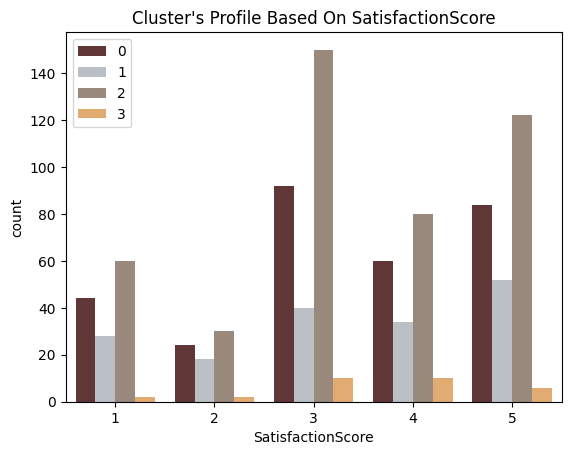

In [ ]:
pl = sns.countplot(data = raw_data_churn,x=raw_data_churn["SatisfactionScore"],hue=raw_data_churn["clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On SatisfactionScore")
plt.legend()
plt.show()

Group 2: SastisfactionScore is high from 3 to 5

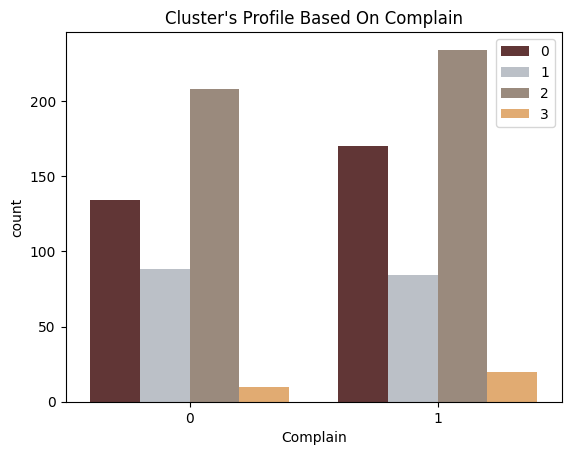

In [ ]:
pl = sns.countplot(data = raw_data_churn,x=raw_data_churn["Complain"],hue=raw_data_churn["clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On Complain")
plt.legend()
plt.show()

##Features of each group:

Group 0: This group seems to have a low frequency of purchases, but when they do purchase, the increase is significant. They live mostly in higher-tier cities and spend less time on the app.


Group 1: This group has medium purchase frequency with high order increase. They are distributed across all city tiers and spend a moderate amount of time on the app.



Group 2: This group is characterized by low purchase frequency with significant order increase, high satisfaction scores, and considerable time spent on the app.



Group 3: This group has the highest purchase frequency with the least increase in orders. They mostly live in higher and mixed-tier cities and spend the least time on the app.



To effectively re-engage the churned users, here are tailored promotion strategies for each group, along with the reasons behind these strategies:

### Group 0
- **Promotion**: Offer higher cashback and exclusive discounts on Mobile purchases.
- **Reason**: This group has a high order increase percentage despite low frequency and prefers Mobile products. Increasing cashback can incentivize more frequent purchases. Since they spend less time on the app, promotions should be prominently advertised via email or push notifications.

### Group 1
- **Promotion**: Provide bundle deals and exclusive offers on Fashion and Laptop & Accessories, along with loyalty points for each purchase.
- **Reason**: This group shows medium purchase frequency and spends on specific categories. Bundle deals and loyalty points can encourage repeat purchases, leveraging their existing spending habits.

### Group 2
- **Promotion**: Offer personalized discount codes and high-value coupons for Mobile phones and Laptop & Accessories, paired with enhanced customer service touchpoints.
- **Reason**: This group has high satisfaction scores and spends significant time on the app. Personalized discounts and high-value coupons can enhance their experience, while excellent customer service can further boost satisfaction and loyalty.

### Group 3
- **Promotion**: Introduce VIP membership programs with exclusive access to sales, higher cashback on every purchase, and personalized product recommendations.
- **Reason**: This group has the highest purchase frequency and uses the most coupons. A VIP program can make them feel valued and encourage continued high-frequency purchases. Personalized recommendations and higher cashback will cater to their coupon usage habits.

### Detailed Breakdown of Promotions and Reasons

#### Group 0
- **Higher Cashback and Discounts**: Offering higher cashback (e.g., 10-15%) and exclusive discounts (e.g., 20% off on the next Mobile purchase) can attract attention and drive purchases.
- **Prominent Advertising**: Use direct communication channels like emails and push notifications since they spend less time on the app.

#### Group 1
- **Bundle Deals**: Creating bundles (e.g., Fashion items combined with Laptop accessories at a discount) can provide value and encourage multi-category purchases.
- **Loyalty Points**: Introducing a points system where users earn points for every purchase that can be redeemed for discounts or free items can foster loyalty and repeat purchases.

#### Group 2
- **Personalized Discount Codes**: Using data on their past purchases to offer tailored discount codes can make promotions more relevant and enticing.
- **High-Value Coupons**: Providing high-value coupons (e.g., $20 off on orders above $100) can motivate larger purchases.
- **Enhanced Customer Service**: Offering priority customer support or a dedicated customer service representative can improve their satisfaction and likelihood of re-engagement.

#### Group 3
- **VIP Membership Programs**: Creating a membership program that offers benefits like early access to sales, higher cashback (e.g., 15-20%), and personalized product recommendations can make them feel valued and incentivize continued high-frequency purchases.
- **Exclusive Access**: Providing access to exclusive sales or limited-edition products can create a sense of exclusivity and urgency, encouraging more purchases.

By implementing these tailored promotions, the company can effectively address the unique needs and preferences of each group, enhancing their shopping experience and increasing the likelihood of re-engagement.